In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

def openAndMerge(results_csv, certs_csv):
    results_df = pd.read_csv('D:\Research Results\CSVs\\' + results_csv, low_memory=False)
    results_df.rename(columns={'Certificate_ID': 'certificate_ID'}, inplace=True)
    certs_df = pd.read_csv('D:\Research Results\CSVs\\' + certs_csv)
    
    # Merge
    merged_df = pd.merge(results_df, certs_df, on="certificate_ID", how="left")
    
    # Remove entries before Sep 21, 2016
    mrfcsc_date = np.datetime64('2016-09-21 00:00:00')
    
    merged_df['certificate_date'] = pd.to_datetime(merged_df['certificate_date'], format='%Y-%m-%d %H:%M:%S%z')
    merged_df['certificate_date'] = pd.to_datetime(merged_df.certificate_date).dt.tz_localize(None)
    filtered_df = merged_df[merged_df['certificate_date'] > mrfcsc_date]
    filtered_df.sort_values(by=['certificate_date'])
    
    return filtered_df

In [2]:
sorel_df = openAndMerge('sorel_results.csv', 'sorel_certs.csv')

In [3]:
symantec_df = openAndMerge('symantec_results.csv', 'symantec_certs.csv')

In [4]:
virusshare_df = openAndMerge('virusshare_results.csv', 'virusshare_certs.csv')

## Merge All DataFrames

In [5]:
frames = [sorel_df, symantec_df, virusshare_df]
all_df = pd.concat(frames)
print(all_df)

                                            certificate_ID  \
1        sorel/0136db9ba822b60a4c2093579ba6e00d15b7931c...   
2        sorel/02119ccbe81e09246167a5214c0d3fce8ab034cd...   
3        sorel/0283830e4b181b8430bf682b00e6b63e3eb4890e...   
4        sorel/02eae93f28a6f23232290f4a3b289b6736709e62...   
5        sorel/02f6c5cd161bab713450abd5a0281686746d726e...   
...                                                    ...   
1005745  virusshare/cs_cert_ffe64220281594771f1b744679e...   
1005746  virusshare/cs_cert_ffe64220281594771f1b744679e...   
1005747  virusshare/cs_cert_ffe64220281594771f1b744679e...   
1005748  virusshare/cs_cert_ffe64220281594771f1b744679e...   
1005749  virusshare/cs_cert_ffe64220281594771f1b744679e...   

                                          lint_name result  \
1               e_signature_algorithm_not_supported   warn   
2               e_signature_algorithm_not_supported   warn   
3               e_signature_algorithm_not_supported   warn   
4      

## Filter Main DataFrame to Only Errors and Warns

In [6]:
errors_and_warns_df = all_df[(all_df['result'] == 'error') | (all_df['result'] == 'warn')]
errors_and_warns_df

,certificate_ID,lint_name,result,certificate_issuer,certificate_subject,certificate_date
1,sorel/0136db9ba822b60a4c2093579ba6e00d15b7931c...,e_signature_algorithm_not_supported,warn,GlobalSign nv-sa,YANDEX LLC,2017-08-21 09:50:47
2,sorel/02119ccbe81e09246167a5214c0d3fce8ab034cd...,e_signature_algorithm_not_supported,warn,"VeriSign, Inc.","Henan Pushitong Intelligent Technology Co., Ltd.",2017-10-13 00:00:00
3,sorel/0283830e4b181b8430bf682b00e6b63e3eb4890e...,e_signature_algorithm_not_supported,warn,GlobalSign nv-sa,环玺数字签名测试证书SHA1,2016-11-08 08:19:17
4,sorel/02eae93f28a6f23232290f4a3b289b6736709e62...,e_signature_algorithm_not_supported,warn,Microsoft Corporation,Microsoft Corporation,2018-08-23 20:20:34
5,sorel/02f6c5cd161bab713450abd5a0281686746d726e...,e_signature_algorithm_not_supported,warn,DigiCert Inc,SecureAge Technology Pte Ltd,2017-02-24 00:00:00
...,...,...,...,...,...,...
990700,virusshare/cs_cert_fc1ab1362ff94fd1cf6742600a0...,e_signature_algorithm_not_supported,warn,"VeriSign, Inc.","Shanghai 2345 Mobile Technology Co., Ltd.",2017-07-04 00:00:00
997452,virusshare/cs_cert_fde4a2fc9cfc9ab3de017133ec7...,e_signature_algorithm_not_supported,warn,GlobalSign nv-sa,Syncopate LLC,2018-08-27 07:49:00
999000,virusshare/cs_cert_fe3ddc42521397642ad452593a6...,e_signature_algorithm_not_supported,warn,GlobalSign nv-sa,piddingtontechnology.com,2016-11-28 15:16:38
1004871,virusshare/cs_cert_ffafe8bcd3f7ab9d05b759ebfd8...,e_sub_cert_eku_usage_legal,error,WoSign CA Limited,海南格睿达展科技发展有限公司,2018-01-30 10:29:04


## Find Most Common Misissuances Across All Datasets

In [7]:
from collections import Counter

misissuance_counter = Counter(errors_and_warns_df['lint_name'])
print(misissuance_counter)

Counter({'e_signature_algorithm_not_supported': 1524, 'e_sub_cert_certificate_policies_missing': 248, 'e_sub_cert_valid_time_longer_than_39_months': 243, 'e_subscriber_certificate_province_must_appear': 242, 'e_subscriber_certificate_locality_name_must_appear': 242, 'e_sub_cert_key_usage_missing': 215, 'e_sub_cert_eku_usage_legal': 172, 'e_sub_cert_aia_does_not_contain_issuing_ca_url': 167, 'e_ext_authority_key_identifier_no_key_identifier': 158, 'e_sub_cert_aia_missing': 155, 'e_sub_cert_crl_destribution_points_missing': 154, 'e_sub_cert_eku_missing': 140, 'e_subject_organization_name_missing': 132, 'w_serial_number_low_entropy': 100, 'e_subscriber_certificate_country_name_must_appear': 65, 'e_rsa_mod_less_than_2048_bits': 55, 'e_sub_cert_eku_code_signing_not_set': 54, 'e_sub_cert_key_usage_uneccessary_bit_set': 44, 'e_cert_extensions_version_not_3': 33, 'e_subject_country_not_iso': 31, 'e_sub_cert_key_not_critical': 31, 'e_subject_common_name_missing': 15, 'e_ev_postalCode_missing': 

## Plot the Top 10 Misissuances in the Counter

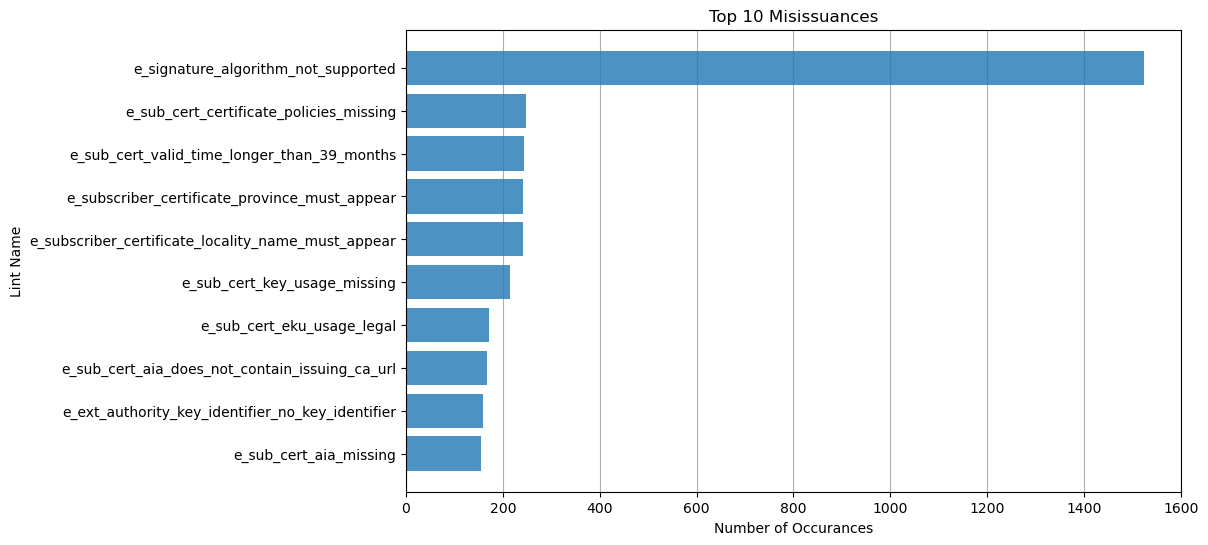

In [8]:
top_10 = misissuance_counter.most_common(10)

x = [] 
y= []

for i in top_10:
    x.append(i[0])
    y.append(i[1])
 
plt.figure(figsize=(10,6))
horizontal_bar = plt.barh(x, y, alpha=0.8)
ax = plt.gca()
ax.invert_yaxis()
ax.set_axisbelow(True)
ax.grid(axis='x')

plt.title('Top 10 Misissuances')
plt.xlabel('Number of Occurances')
plt.ylabel('Lint Name')

plt.savefig('top_10_misissuances.png', bbox_inches="tight")



## Plot Misissuance over time:

                   index   0
948  2016-12-03 04:46:57   1
984  2016-12-27 08:19:56   1
1154 2017-06-03 00:00:00   1
467  2018-04-06 00:00:00   1
1226 2016-12-28 11:12:25   1
...                  ...  ..
537  2018-09-13 07:45:14  14
465  2017-12-31 23:00:00  23
522  2018-04-18 00:00:00  26
485  2018-02-20 00:00:00  26
413  2018-12-03 00:00:00  26

[1260 rows x 2 columns]


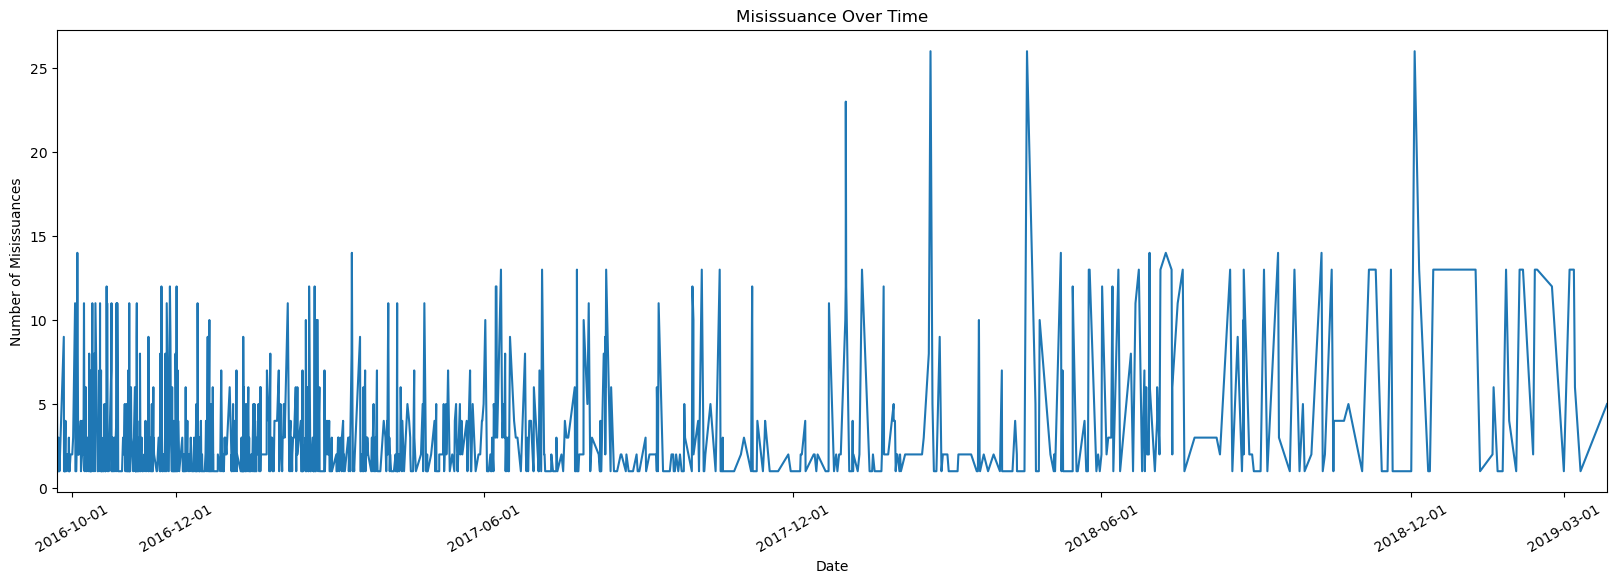

In [9]:
dates = Counter(errors_and_warns_df['certificate_date'])
dates_df = pd.DataFrame.from_dict(dates, orient='index').reset_index()
dates_df = dates_df.sort_values(by=['index'])

dates_df = dates_df.drop([399])
print(dates_df.sort_values(by=[0]))

plt.figure(figsize=(20,6))
plt.plot(dates_df['index'], dates_df[0])
plt.xlim(dates_df['index'].min(), dates_df['index'].max())

ticks = ['2016-10-01', '2016-12-01', '2017-06-01', '2017-12-01', '2018-06-01', '2018-12-01', '2019-03-01']
plt.xticks(ticks, rotation=30)
plt.title('Misissuance Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Misissuances')
plt.savefig('misissuance_over_time.png', bbox_inches="tight")

In [10]:
unique = errors_and_warns_df.drop_duplicates(['certificate_ID'])

dates = np.array(unique['certificate_date'])
print(len(dates))

2193


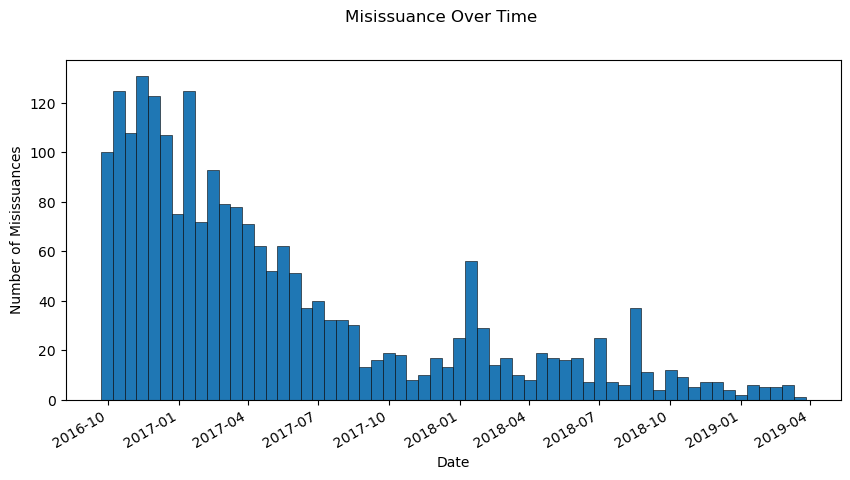

In [11]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(1,1, figsize=(10, 5))
dates.sort()
ax.hist(dates, bins=60, range=(dates[0], dates[-1]), edgecolor = 'black', linewidth=0.4)
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
fig.suptitle('Misissuance Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Misissuances')

plt.savefig('misissuance_over_time_2.png')

## Plot Most Common CAs that misissue:

['Microsoft Corporation', 'VeriSign, Inc.', 'Unizeto Technologies S.A.', 'WoSign CA Limited', 'GlobalSign nv-sa', 'COMODO CA Limited', 'DigiCert Inc', 'Internet Widgits Pty Ltd', 'Thawte, Inc.', 'Symantec Corporation']
[569, 538, 368, 314, 273, 230, 220, 114, 103, 75]


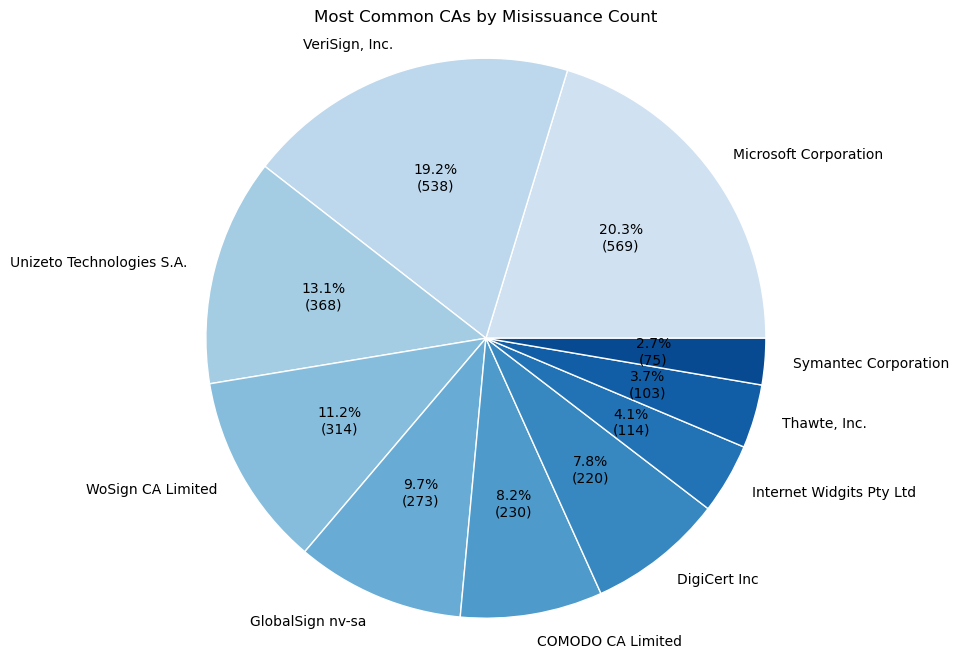

In [12]:
cas = Counter(errors_and_warns_df['certificate_issuer'].dropna())

top_10_cas = cas.most_common(10)

x = [] 
y= []

for i in top_10_cas:
    x.append(i[0])
    y.append(i[1])
    
print(x)
print(y)

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.9, len(x)))
fig, ax = plt.subplots(figsize=(8, 8))
#ax.pie(y, colors=colors, wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True, labels=x, autopct='%.1f%%')
ax.pie(y, colors=colors, wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True, labels=x, autopct=lambda pct: func(pct, y))
ax.set_axis_off()
plt.title('Most Common CAs by Misissuance Count')

plt.savefig('most_common_cas.png', bbox_inches="tight")

## Create Tree Map of CA Misissuance:

[1.0, 0.923076923076923, 0.8461538461538461, 0.8461538461538461, 0.923076923076923, 0.6153846153846154, 0.7692307692307693, 0.8461538461538461, 0.8461538461538461, 0.7692307692307693, 0.8461538461538461, 0.8461538461538461, 0.8461538461538461, 0.8461538461538461, 1.0, 0.7692307692307693, 0.923076923076923, 0.8461538461538461, 0.8461538461538461, 0.8461538461538461, 0.8461538461538461, 0.923076923076923, 0.7692307692307693, 0.07692307692307693, 0.7692307692307693, 0.4615384615384615, 0.8461538461538461, 0.07692307692307693, 0.8461538461538461, 0.8461538461538461, 0.38461538461538464, 0.923076923076923, 0.8461538461538461, 0.8461538461538461, 0.8461538461538461, 0.8461538461538461, 0.23076923076923075, 0.4615384615384615, 0.4230769230769231, 0.07692307692307693, 0.34615384615384615, 0.038461538461538464, 0.07692307692307693, 0.019230769230769232, 0.4700854700854701, 0.8769230769230769, 0.2747252747252747, 0.18681318681318682, 0.019943019943019943, 0.019851116625310174, 0.0761834319526627

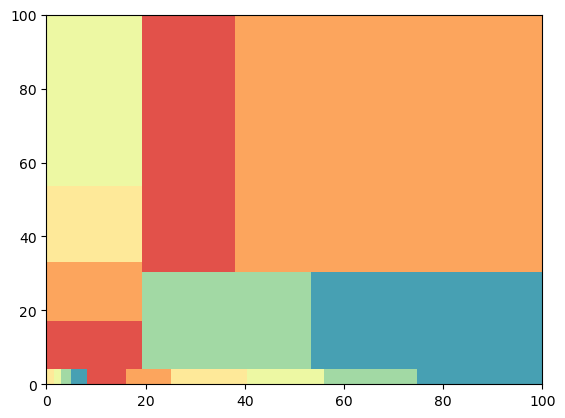

In [104]:
import squarify
import seaborn as sb
import matplotlib as mpl

def generate_colors(percentages):

    return
sizes = all_df['certificate_issuer'].value_counts().to_frame()
errors = unique['certificate_issuer'].value_counts().to_frame()

# Overlap sizes with errors to only get the CAs that possessed misissuances:

cas_df = pd.DataFrame.from_dict(cas, orient='index').reset_index()
cas_df = cas_df.rename(columns={'index':'certificate_issuer'})

overlap = pd.merge(sizes, cas_df, how='inner', on=['certificate_issuer'])
overlap = overlap.sort_values(by=['count'])

percentages = overlap[0] / overlap['count']
norm = [float(i)/max(percentages) for i in percentages]
print(norm)


viridis = mpl.colormaps['cool']

colors = []

for i in range(len(percentages)):
    colors.append(viridis(norm[i]))

    squarify.plot(sizes=np.array(overlap['count']), color=sb.color_palette('Spectral'))